In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/English/alphabet/A_Z Handwritten Data.csv')

In [3]:
df.rename(columns={'0':'label'}, inplace=True)

In [4]:
y = df["label"]

# Drop 'label' column
X = df.drop(labels = ["label"],axis = 1)

In [5]:
# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset = df.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

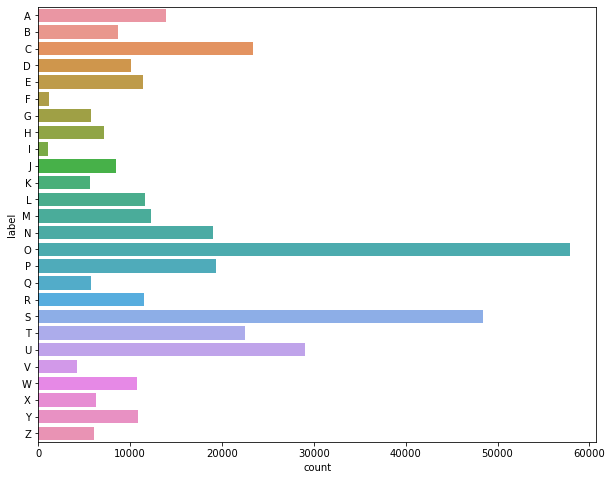

In [6]:
import seaborn as sns

plt.figure(figsize=(10,8))
graph = sns.countplot(y=dataset['label'])
plt.show()

In [7]:
# free some space
del df
del dataset

y.value_counts()

14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13869
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: label, dtype: int64

In [8]:
X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
X /=  255.0

X = X.values.reshape(-1,28,28,1).astype('float32')

In [10]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [12]:
num_classes = y_test.shape[1] # 26

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# my CNN architecture is In -> [[Conv2D->relu]*2 -> MaxPooling2D]*2 -> Dropout -> Flatten -> Dense -> Dense -> Out

model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=256, verbose=1)

Train on 316582 samples, validate on 55868 samples
Epoch 1/20
316582/316582 [==============================] - 1058s 3ms/sample - loss: 0.1394 - acc: 0.9614 - val_loss: 0.0520 - val_acc: 0.9854
Epoch 2/20
316582/316582 [==============================] - 1058s 3ms/sample - loss: 0.0447 - acc: 0.9872 - val_loss: 0.0397 - val_acc: 0.9890
Epoch 3/20
316582/316582 [==============================] - 1055s 3ms/sample - loss: 0.0318 - acc: 0.9905 - val_loss: 0.0317 - val_acc: 0.9912
Epoch 4/20
316582/316582 [==============================] - 1053s 3ms/sample - loss: 0.0256 - acc: 0.9923 - val_loss: 0.0259 - val_acc: 0.9922
Epoch 5/20
316582/316582 [==============================] - 1056s 3ms/sample - loss: 0.0198 - acc: 0.9938 - val_loss: 0.0259 - val_acc: 0.9926
Epoch 6/20
316582/316582 [==============================] - 1058s 3ms/sample - loss: 0.0167 - acc: 0.9947 - val_loss: 0.0280 - val_acc: 0.9924
Epoch 7/20
316582/316582 [==============================] - 1060s 3ms/sample - loss: 0.0135

In [15]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose = 0)

In [16]:
print('Test loss: %.4f%%' % scores[0])
print('Test accuracy: %.4f%%' % scores[1])
print("Large CNN Error: %.4f%%" % (100-scores[1]*100))

Test loss: 0.0196%
Test accuracy: 0.9971%
Large CNN Error: 0.2935%


In [17]:
model.save('output/E_A.h5')